In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

In [3]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v3', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [60]:
m_cii.update(model_par = {'zdex': 0.3,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.017,
 'BehrooziFile': 'sfr_reinterp.dat'}, tobs = 40000*u.h)

In [56]:
m_cii.tobs

<Quantity 40000. h>

In [53]:
signal_10 = m_cii.maps
forecast_10_2 = m_cii.noise_added_map

In [57]:
forecast_10_40 = m_cii.noise_added_map

Loading .npz catalogues...


In [59]:
signal_03 = m_cii.maps
forecast_03_2 = m_cii.noise_added_map

Loading .npz catalogues...


In [61]:
forecast_03_40 = m_cii.noise_added_map

Loading .npz catalogues...


Making some histograms

Pure signal:

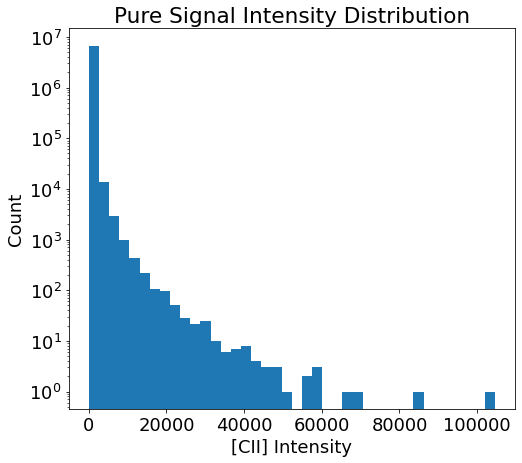

In [80]:
plt.hist(signal.value.flatten(), bins = 40)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Pure Signal Intensity Distribution')
#plt.savefig('CII_analysis/PS_hist.png', bbox_inches = 'tight')

Text(0.5, 1.0, 'Pure Signal Intensity Distribution')

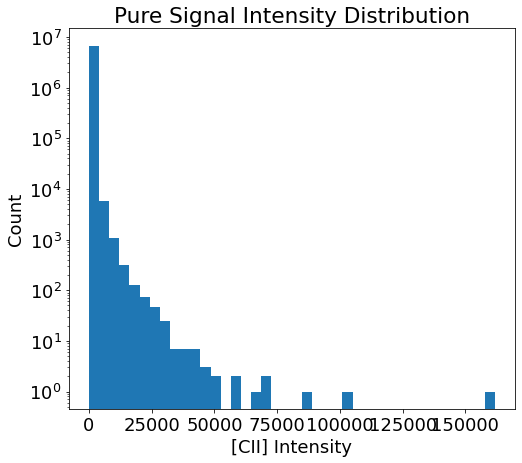

In [62]:
plt.hist(signal_03.value.flatten(), bins = 40)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Pure Signal Intensity Distribution')
#plt.savefig('CII_analysis/PS_hist.png', bbox_inches = 'tight')

Forecast, 2000h:

Text(0.5, 1.0, 'Forecast, tobs = 2000h')

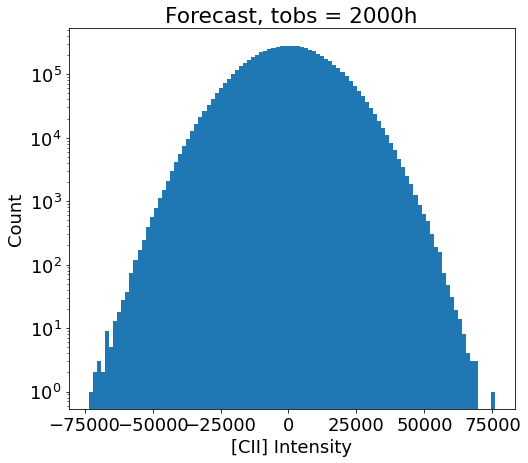

In [88]:
plt.hist(forecast.flatten(), bins = 100)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Forecast, tobs = 2000h')
#plt.savefig('CII_analysis/FC_hist.png', bbox_inches = 'tight')

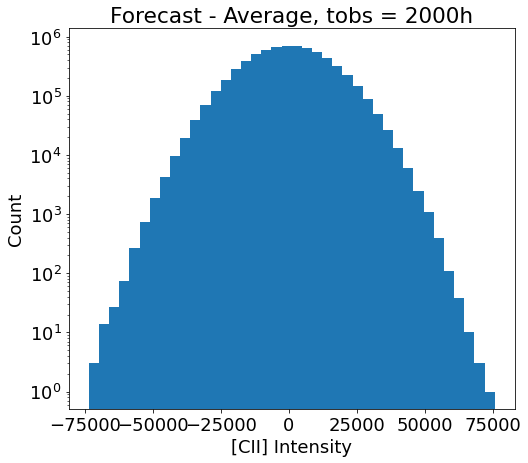

In [83]:
plt.hist(forecast.flatten() - np.mean(forecast), bins = 40)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Forecast - Average, tobs = 2000h')
#plt.savefig('CII_analysis/FCA_hist.png', bbox_inches = 'tight')

Forecast, 40000h:

In [75]:
m_cii.update(tobs = 40000*u.h)

In [76]:
forecast_40 = m_cii.noise_added_map

Loading .npz catalogues...


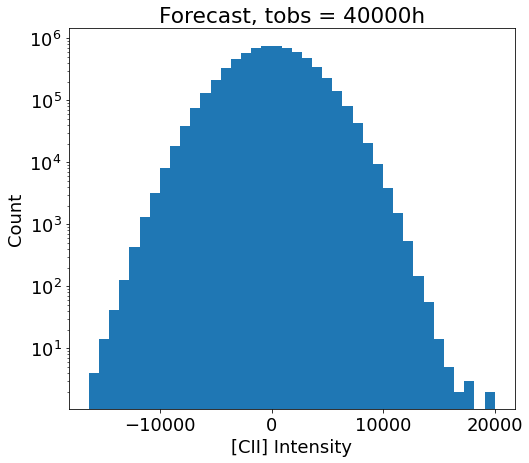

In [84]:
plt.hist(forecast_40.flatten(), bins = 40)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Forecast, tobs = 40000h')
plt.savefig('CII_analysis/FC_hist_40.png', bbox_inches = 'tight')

Text(0.5, 1.0, 'Forecast - Average, tobs = 40000h')

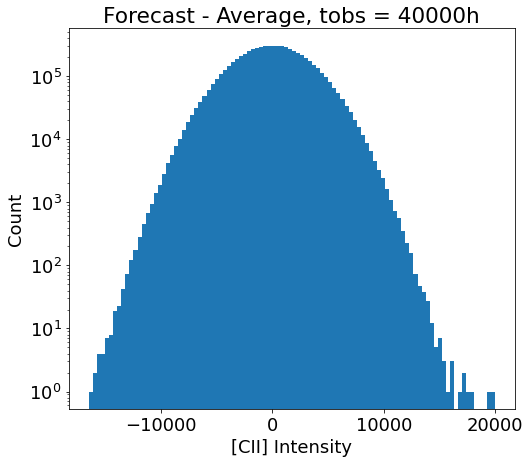

In [87]:
plt.hist(forecast_40.flatten() - np.mean(forecast_40), bins = 100)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Forecast - Average, tobs = 40000h')
#plt.savefig('CII_analysis/FCA_hist_40.png', bbox_inches = 'tight')

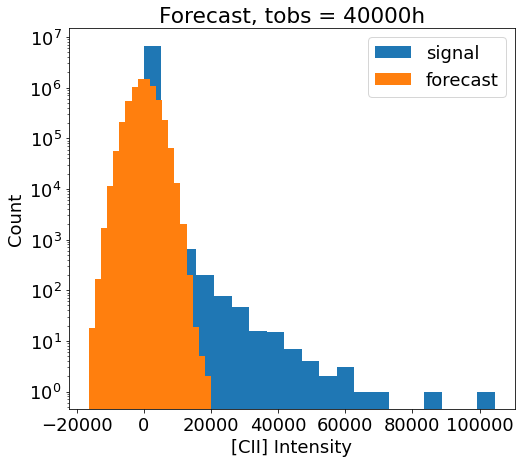

In [100]:
plt.hist(signal.value.flatten(), bins = 20, label = 'signal')
plt.hist(forecast_40.flatten(), bins = 20, label = 'forecast')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Forecast, tobs = 40000h')
plt.legend()
#plt.savefig('CII_analysis/FC_hist_40.png', bbox_inches = 'tight')

Supplement:

(-25000.0, 25000.0)

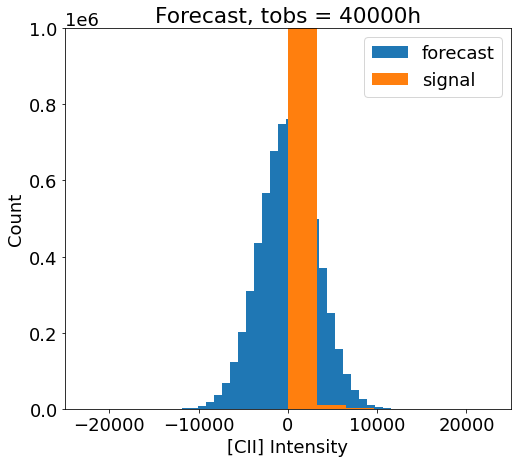

In [78]:
plt.hist(forecast_03_40.flatten(), bins = 50, label = 'forecast')
plt.hist(signal_03.value.flatten(), bins = 50, label = 'signal')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Forecast, tobs = 40000h')
plt.legend()
#plt.savefig('CII_analysis/FC_hist_40.png', bbox_inches = 'tight')
plt.ylim([0, 10**(6)])
plt.xlim([-25000, 25000])

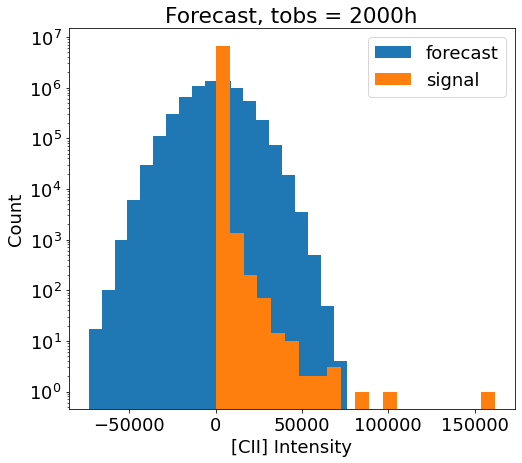

In [65]:
plt.hist(forecast_03_2.flatten(), bins = 20, label = 'forecast')
plt.hist(signal_03.value.flatten(), bins = 20, label = 'signal')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Forecast, tobs = 2000h')
plt.legend()
#plt.savefig('CII_analysis/FC_hist_40.png', bbox_inches = 'tight')

Text(0.5, 1.0, 'Forecast, tobs = 40000h')

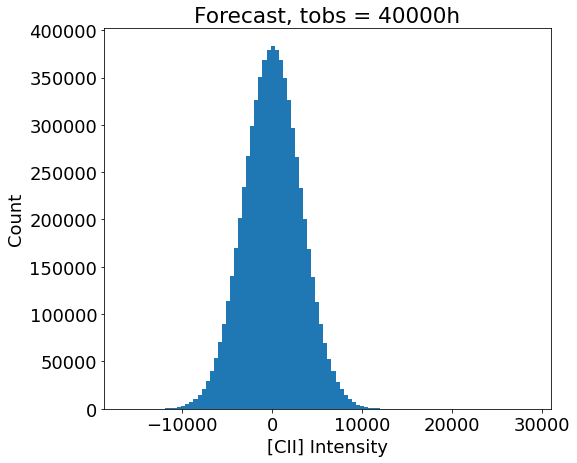

In [69]:
plt.hist(forecast_03_40.flatten(), bins = 100)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Forecast, tobs = 40000h')
#plt.savefig('CII_analysis/FCA_hist_40.png', bbox_inches = 'tight')

Up and down?

Text(0.5, 1.0, 'zdex = 1.0')

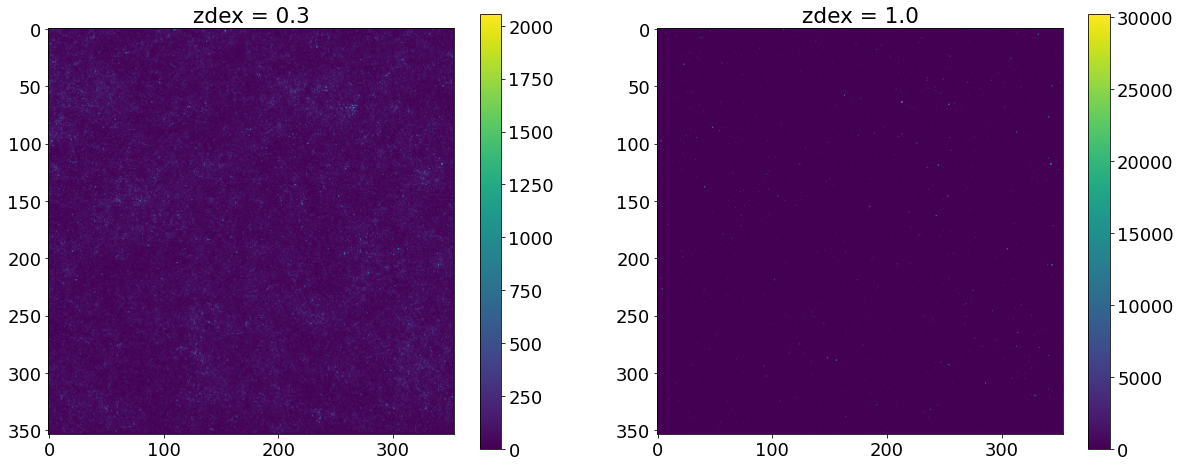

In [188]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

plt.subplot(121)
plt.imshow(np.mean(signal.value, axis = 2))
plt.colorbar()
plt.title('zdex = 0.3')

plt.subplot(122)
plt.imshow(np.mean(signal_10.value, axis = 2))
plt.colorbar()
plt.title('zdex = 1.0')

In [183]:
np.mean(signal - signal_10)

<Quantity 1.47700311 Jy / sr>

In [177]:
sig_diff = np.mean(np.mean((signal - signal_10).value, axis = 2), axis = 0)
fc_diff = np.mean(np.mean((forecast - forecast_10), axis = 2), axis = 0)

Text(0, 0.5, 'Signal')

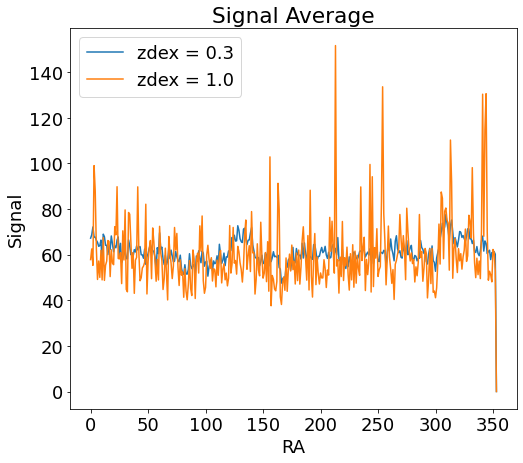

In [190]:
plt.plot(np.mean(np.mean(signal.value, axis = 2), axis = 0), label = 'zdex = 0.3')
plt.plot(np.mean(np.mean(signal_10.value, axis = 2), axis = 0), label = 'zdex = 1.0')
#plt.hlines(y = np.mean(sig_diff), xmin = 0, xmax = 354, color = 'r', linestyle = '--', label = 'Average')
#plt.hlines(y = 0, xmin = 0, xmax = 354, color = 'k', linestyle = '--', label = '0')
plt.legend()
plt.title('Signal Average')
plt.xlabel('RA')
plt.ylabel('Signal')

Text(0, 0.5, 'Signal difference')

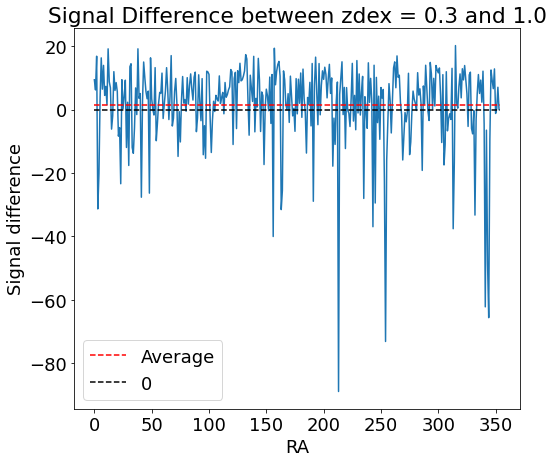

In [184]:
plt.plot(sig_diff)
plt.hlines(y = np.mean(sig_diff), xmin = 0, xmax = 354, color = 'r', linestyle = '--', label = 'Average')
plt.hlines(y = 0, xmin = 0, xmax = 354, color = 'k', linestyle = '--', label = '0')
plt.legend()
plt.title('Signal Difference between zdex = 0.3 and 1.0')
plt.xlabel('RA')
plt.ylabel('Signal difference')

Text(0.5, 1.0, 'Forecast Difference between zdex = 0.3 and 1.0')

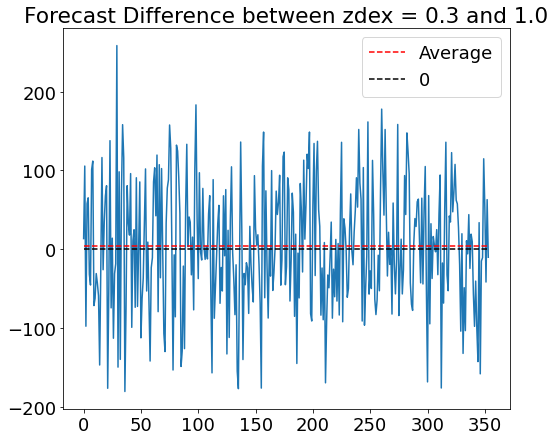

In [180]:
plt.plot(fc_diff)
plt.hlines(y = np.mean(fc_diff), xmin = 0, xmax = 354, color = 'r', linestyle = '--', label = 'Average')
plt.hlines(y = 0, xmin = 0, xmax = 354, color = 'k', linestyle = '--', label = '0')
plt.legend()
plt.title('Forecast Difference between zdex = 0.3 and 1.0')

Saving:

In [4]:
lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]
from datetime import datetime

In [5]:
m = lim()
m_cii = lim('Lichen_v3', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [6]:
m_cii.update(model_par = {'zdex': 1.0,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.017,
 'BehrooziFile': 'sfr_reinterp.dat'})

In [8]:
m_cii.model_par

{'zdex': 1.0,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.017,
 'BehrooziFile': 'sfr_reinterp.dat'}

In [9]:
sig_sims_10 = [0 for i in range(len(onlyfiles))]
fc_sims_10 = [0 for i in range(len(onlyfiles))]

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Beginning time =", current_time)
print("------")

for i in range(len(onlyfiles)):
    m_cii.update(catalogue_file = f"{onlyfiles[i]}")
    print('Loading', i, 'th lightcone...')
    sig_sims_10[i] = m_cii.maps
    fc_sims_10[i] = m_cii.noise_added_map
    print('Finished loading', i, 'th lightcone!')
    
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("------")
print("Finished computing at =", current_time)

Beginning time = 13:48:44
------
Loading 0 th lightcone...
Loading .npz catalogues...
Finished loading 0 th lightcone!
Loading 1 th lightcone...
Loading .npz catalogues...
Finished loading 1 th lightcone!
Loading 2 th lightcone...
Loading .npz catalogues...
Finished loading 2 th lightcone!
Loading 3 th lightcone...
Loading .npz catalogues...
Finished loading 3 th lightcone!
Loading 4 th lightcone...
Loading .npz catalogues...
Finished loading 4 th lightcone!
Loading 5 th lightcone...
Loading .npz catalogues...
Finished loading 5 th lightcone!
Loading 6 th lightcone...
Loading .npz catalogues...
Finished loading 6 th lightcone!
Loading 7 th lightcone...
Loading .npz catalogues...
Finished loading 7 th lightcone!
Loading 8 th lightcone...
Loading .npz catalogues...
Finished loading 8 th lightcone!
Loading 9 th lightcone...
Loading .npz catalogues...
Finished loading 9 th lightcone!
Loading 10 th lightcone...
Loading .npz catalogues...
Finished loading 10 th lightcone!
Loading 11 th light

Finished loading 93 th lightcone!
Loading 94 th lightcone...
Loading .npz catalogues...
Finished loading 94 th lightcone!
Loading 95 th lightcone...
Loading .npz catalogues...
Finished loading 95 th lightcone!
Loading 96 th lightcone...
Loading .npz catalogues...
Finished loading 96 th lightcone!
Loading 97 th lightcone...
Loading .npz catalogues...
Finished loading 97 th lightcone!
Loading 98 th lightcone...
Loading .npz catalogues...
Finished loading 98 th lightcone!
Loading 99 th lightcone...
Loading .npz catalogues...
Finished loading 99 th lightcone!
Loading 100 th lightcone...
Loading .npz catalogues...
Finished loading 100 th lightcone!
Loading 101 th lightcone...
Loading .npz catalogues...
Finished loading 101 th lightcone!
Loading 102 th lightcone...
Loading .npz catalogues...
Finished loading 102 th lightcone!
Loading 103 th lightcone...
Loading .npz catalogues...
Finished loading 103 th lightcone!
Loading 104 th lightcone...
Loading .npz catalogues...
Finished loading 104 th

Finished loading 185 th lightcone!
Loading 186 th lightcone...
Loading .npz catalogues...
Finished loading 186 th lightcone!
Loading 187 th lightcone...
Loading .npz catalogues...
Finished loading 187 th lightcone!
Loading 188 th lightcone...
Loading .npz catalogues...
Finished loading 188 th lightcone!
Loading 189 th lightcone...
Loading .npz catalogues...
Finished loading 189 th lightcone!
Loading 190 th lightcone...
Loading .npz catalogues...
Finished loading 190 th lightcone!
Loading 191 th lightcone...
Loading .npz catalogues...
Finished loading 191 th lightcone!
Loading 192 th lightcone...
Loading .npz catalogues...
Finished loading 192 th lightcone!
Loading 193 th lightcone...
Loading .npz catalogues...
Finished loading 193 th lightcone!
Loading 194 th lightcone...
Loading .npz catalogues...
Finished loading 194 th lightcone!
Loading 195 th lightcone...
Loading .npz catalogues...
Finished loading 195 th lightcone!
Loading 196 th lightcone...
Loading .npz catalogues...
Finished l

Can't save: takes +5Gb for one signal array (270 x 354 x 354 x 54) in dimensions

In [ ]:
sig_sims_10 = np.array(sig_sims_10)
fc_sims_10 = np.array(fc_sims_10)

In [10]:
np.shape(np.mean(sig_sims_10, axis = 0))

(354, 354, 54)

In [11]:
np.savetxt('txt_files/sig_sims_zdex10.txt', np.array(np.mean(sig_sims_10, axis = 0)).flatten())

In [12]:
np.savetxt('txt_files/fc_sims_zdex10.txt', np.array(np.mean(fc_sims_10, axis = 0)).flatten())

In [38]:
np.savetxt('txt_files/sig_sims_zdex03.txt', np.array(np.mean(sig_sims, axis = 0)).flatten())

In [39]:
np.savetxt('txt_files/fc_sims_zdex03.txt', np.array(np.mean(fc_sims, axis = 0)).flatten())

In [21]:
sig_sims_avg = np.loadtxt('txt_files/sig_sims_zdex03.txt')
sig_sims_avg = np.reshape(sig_sims_avg, (354, 354, 54))

fc_sims_avg = np.loadtxt('txt_files/fc_sims_zdex03.txt')
fc_sims_avg = np.reshape(fc_sims_avg, (354, 354, 54))

sig_sims_avg_10 = np.loadtxt('txt_files/sig_sims_zdex10.txt')
sig_sims_avg_10 = np.reshape(sig_sims_avg_10, (354, 354, 54))

fc_sims_avg_10 = np.loadtxt('txt_files/fc_sims_zdex10.txt')
fc_sims_avg_10 = np.reshape(fc_sims_avg_10, (354, 354, 54))

In [30]:
sig_sims_avg_ra = np.mean(np.mean(sig_sims_avg, axis = 2), axis = 1)
fc_sims_avg_ra = np.mean(np.mean(fc_sims_avg, axis = 2), axis = 1)
sig_sims_avg_10_ra = np.mean(np.mean(sig_sims_avg_10, axis = 2), axis = 1)
fc_sims_avg_10_ra = np.mean(np.mean(fc_sims_avg_10, axis = 2), axis = 1)

sig_sims_avg_dec = np.mean(np.mean(sig_sims_avg, axis = 2), axis = 0)
fc_sims_avg_dec = np.mean(np.mean(fc_sims_avg, axis = 2), axis = 0)
sig_sims_avg_10_dec = np.mean(np.mean(sig_sims_avg_10, axis = 2), axis = 0)
fc_sims_avg_10_dec = np.mean(np.mean(fc_sims_avg_10, axis = 2), axis = 0)

sig_sims_avg_z = np.mean(np.mean(sig_sims_avg, axis = 0), axis = 0)
fc_sims_avg_z = np.mean(np.mean(fc_sims_avg, axis = 0), axis = 0)
sig_sims_avg_10_z = np.mean(np.mean(sig_sims_avg_10, axis = 0), axis = 0)
fc_sims_avg_10_z = np.mean(np.mean(fc_sims_avg_10, axis = 0), axis = 0)

Text(0.5, 1.0, 'Average Signal Intensity Across RA')

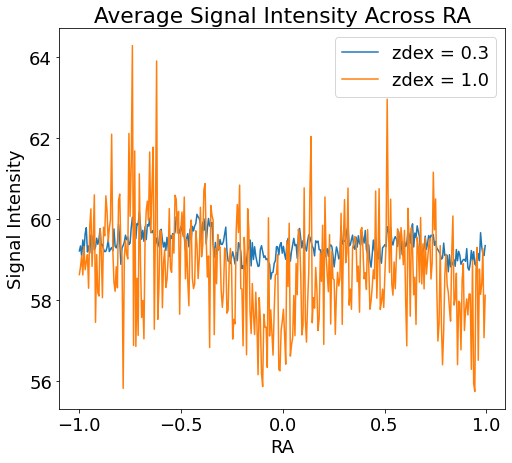

In [37]:
ra = np.linspace(-1, 1, 354)

plt.plot(ra[:-1], sig_sims_avg_ra[:-1], label = 'zdex = 0.3')
plt.plot(ra[:-1], sig_sims_avg_10_ra[:-1], label = 'zdex = 1.0')
plt.legend()
plt.xlabel('RA')
plt.ylabel('Signal Intensity')
plt.title('Average Signal Intensity Across RA')

In [79]:
np.mean(sig_sims_avg_ra)
np.mean(sig_sims_avg_10_ra)

59.19528021200356

In [80]:
np.mean(sig_sims_avg_10_ra)

58.59336504876965

Text(0.5, 1.0, 'zdex 0.3 - zdex 1.0')

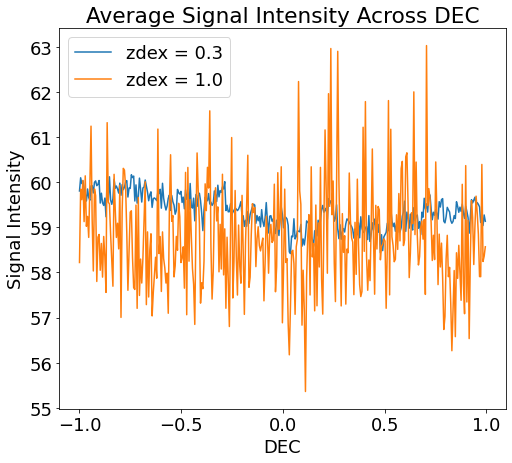

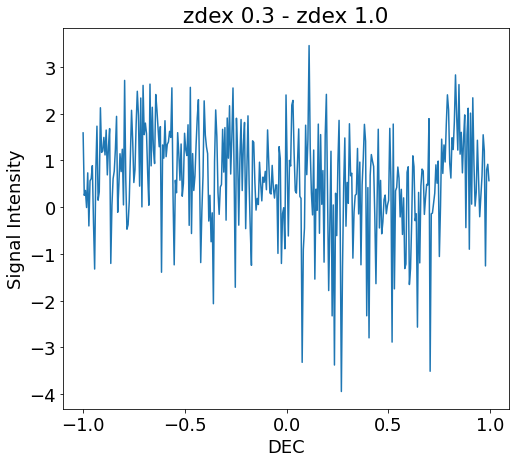

In [43]:
dec = np.linspace(-1, 1, 354)

plt.figure(0)
plt.plot(dec[:-1], sig_sims_avg_dec[:-1], label = 'zdex = 0.3')
plt.plot(dec[:-1], sig_sims_avg_10_dec[:-1], label = 'zdex = 1.0')
plt.legend()
plt.xlabel('DEC')
plt.ylabel('Signal Intensity')
plt.title('Average Signal Intensity Across DEC')

plt.figure(1)
plt.plot(dec[:-1], sig_sims_avg_dec[:-1] - sig_sims_avg_10_dec[:-1])
plt.xlabel('DEC')
plt.ylabel('Signal Intensity')
plt.title('zdex 0.3 - zdex 1.0')

In [82]:
print(np.mean(sig_sims_avg_dec))
np.mean(sig_sims_avg_10_dec)

59.19528021200356


58.593365048769655

Text(0.5, 1.0, 'Residuals')

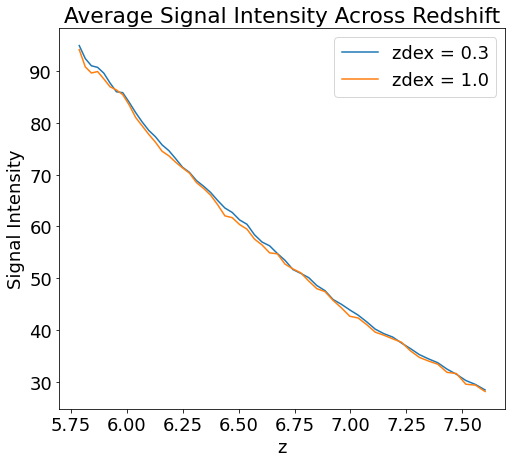

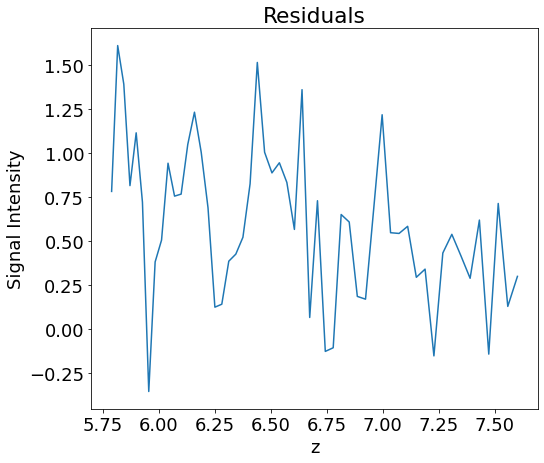

In [83]:
zs = (m_cii.mapinst.nu_rest/m_cii.mapinst.nu_bincents) - 1

plt.figure(0)
plt.plot(zs, sig_sims_avg_z, label = 'zdex = 0.3')
plt.plot(zs, sig_sims_avg_10_z, label = 'zdex = 1.0')
plt.legend()
plt.xlabel('z')
plt.ylabel('Signal Intensity')
plt.title('Average Signal Intensity Across Redshift')

plt.figure(1)
plt.plot(zs, sig_sims_avg_z - sig_sims_avg_10_z)
plt.xlabel('z')
plt.ylabel('Signal Intensity')
plt.title('Residuals')

Intensity Histograms

In [45]:
np.shape(sig_sims_avg)

(354, 354, 54)

Text(0.5, 1.0, 'Pure Signal Intensity Distribution')

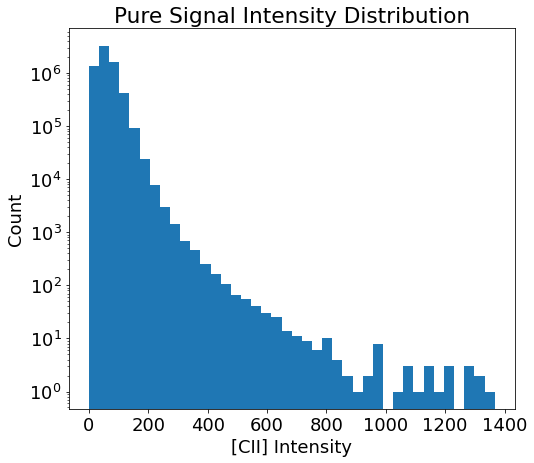

In [47]:
plt.hist(sig_sims_avg.flatten(), bins = 40)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Pure Signal Intensity Distribution')
#plt.savefig('CII_analysis/PS_hist.png', bbox_inches = 'tight')

Text(0.5, 1.0, 'Forecast, tobs = 2000h')

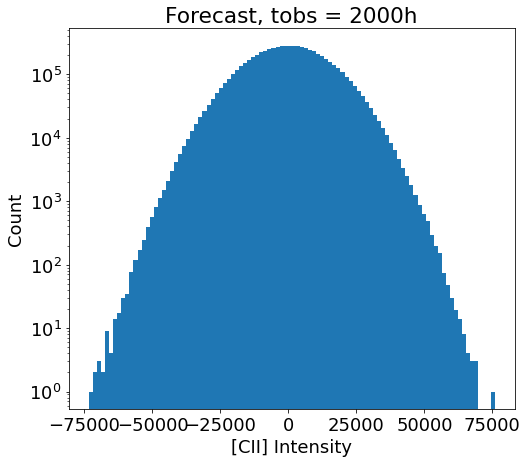

In [48]:
plt.hist(fc_sims_avg.flatten(), bins = 100)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Forecast, tobs = 2000h')
#plt.savefig('CII_analysis/FC_hist.png', bbox_inches = 'tight')

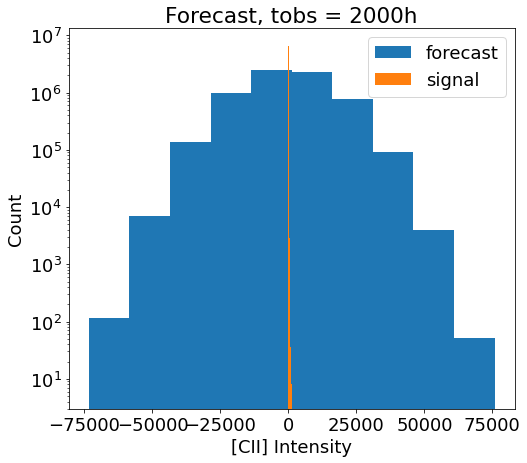

In [51]:
plt.hist(fc_sims_avg.flatten(), label = 'forecast')
plt.hist(sig_sims_avg.flatten(), label = 'signal')

#plt.xscale('log')
plt.yscale('log')
plt.xlabel('[CII] Intensity')
plt.ylabel('Count')
plt.title('Forecast, tobs = 2000h')
plt.legend()
#plt.savefig('CII_analysis/FC_hist_40.png', bbox_inches = 'tight')